# Importations

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

import pickle

# Data Exploration

In [ ]:
df = pd.read_csv('mr_exports_growth.csv')

In [ ]:
df.head(10)

,HS2,HS2 ID,HS4,HS4 ID,Section,Section ID,Trade Value,Trade Value Growth,Trade Value Growth Value,Year
0,Live animals,101,Horses,10101,Animal Products,1,351516.0,-0.445871,-282842.0,2022
1,Live animals,101,Bovine,10102,Animal Products,1,3.0,NaN,NaN,2022
2,Live animals,101,Poultry,10105,Animal Products,1,2061260.0,-0.076328,-170332.0,2022
3,Live animals,101,Other Animals,10106,Animal Products,1,12842179.0,-0.116766,-1697770.0,2022
4,Meat & edible offal,102,Bovine Meat,10201,Animal Products,1,54647.0,-0.138929,-8817.0,2022
5,Meat & edible offal,102,Frozen Bovine Meat,10202,Animal Products,1,142417.0,132.724883,141352.0,2022
6,Meat & edible offal,102,Pig Meat,10203,Animal Products,1,91467.0,-0.175252,-19436.0,2022
7,Meat & edible offal,102,Sheep and Goat Meat,10204,Animal Products,1,397847.0,1.394981,231730.0,2022
8,Meat & edible offal,102,Horse Meat,10205,Animal Products,1,1895.0,NaN,NaN,2022
9,Meat & edible offal,102,Edible Offal,10206,Animal Products,1,17696.0,-0.948736,-327496.0,2022


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20486 entries, 0 to 20485
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   HS2                       20486 non-null  object 
 1   HS2 ID                    20486 non-null  int64  
 2   HS4                       20486 non-null  object 
 3   HS4 ID                    20486 non-null  int64  
 4   Section                   20486 non-null  object 
 5   Section ID                20486 non-null  int64  
 6   Trade Value               20486 non-null  float64
 7   Trade Value Growth        19365 non-null  float64
 8   Trade Value Growth Value  19365 non-null  float64
 9   Year                      20486 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 1.6+ MB


In [ ]:
df = df.dropna()

In [ ]:
df.describe()

,HS2 ID,HS4 ID,Section ID,Trade Value,Trade Value Growth,Trade Value Growth Value,Year
count,19365.000000,19365.000000,19365.000000,1.936500e+04,1.936500e+04,1.936500e+04,19365.000000
mean,1114.887839,111501.571443,10.604389,2.702691e+07,2.235343e+02,2.550243e+06,2013.378673
std,564.856625,56489.138920,5.375558,2.012960e+08,1.901627e+04,4.801142e+07,6.187226
min,101.000000,10101.000000,1.000000,1.000000e+00,-9.999972e-01,-1.166506e+09,2003.000000
25%,629.000000,62933.000000,6.000000,5.011200e+04,-3.423126e-01,-1.147510e+05,2007.000000
50%,1157.000000,115705.000000,11.000000,4.883300e+05,6.793660e-02,5.479000e+03,2014.000000
75%,1583.000000,158302.000000,15.000000,4.289856e+06,7.360315e-01,3.460350e+05,2019.000000
max,2197.000000,219706.000000,21.000000,7.302001e+09,2.607016e+06,1.883116e+09,2022.000000


In [ ]:
df['Year'].unique()

array([2022, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2011, 2010,
       2008, 2007, 2006, 2005, 2004, 2003, 2021])

In [ ]:
df['Section'].value_counts()

Section
Machines                            2464
Textiles                            2415
Chemical Products                   2415
Metals                              2356
Vegetable Products                  1295
Instruments                          955
Foodstuffs                           876
Stone And Glass                      863
Mineral Products                     823
Plastics and Rubbers                 770
Paper Goods                          653
Miscellaneous                        585
Animal Products                      550
Transportation                       490
Wood Products                        471
Animal Hides                         348
Footwear and Headwear                337
Animal and Vegetable Bi-Products     317
Precious Metals                      217
Arts and Antiques                    113
Weapons                               52
Name: count, dtype: int64

# Data Vizualisation

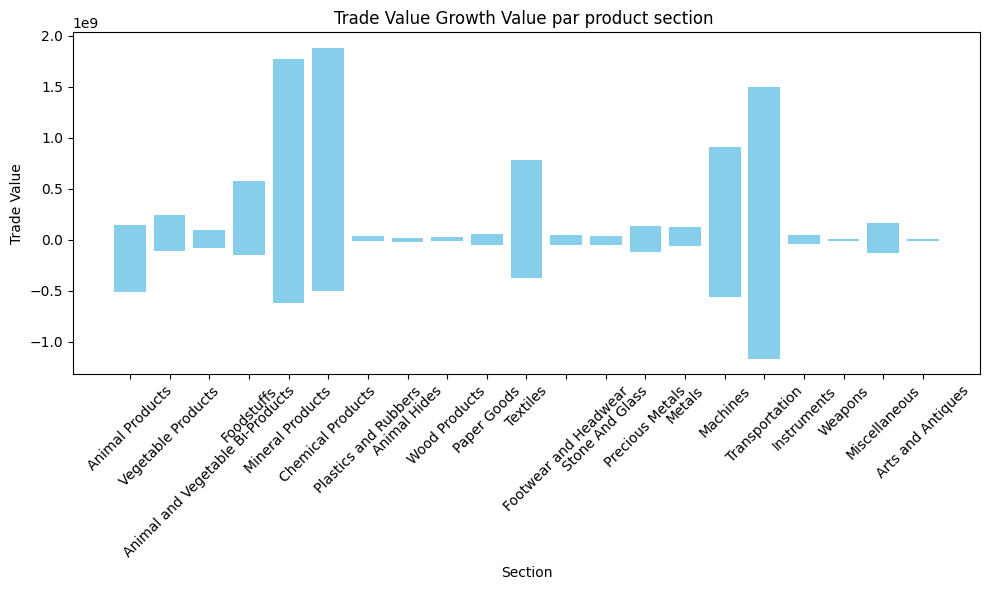

In [ ]:
# Bar Plot pour Trade Value par HS4 Category
plt.figure(figsize=(10, 6))
plt.bar(df['Section'], df['Trade Value Growth Value'], color='skyblue')
plt.xlabel('Section')
plt.ylabel('Trade Value')
plt.title('Trade Value Growth Value par product section ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

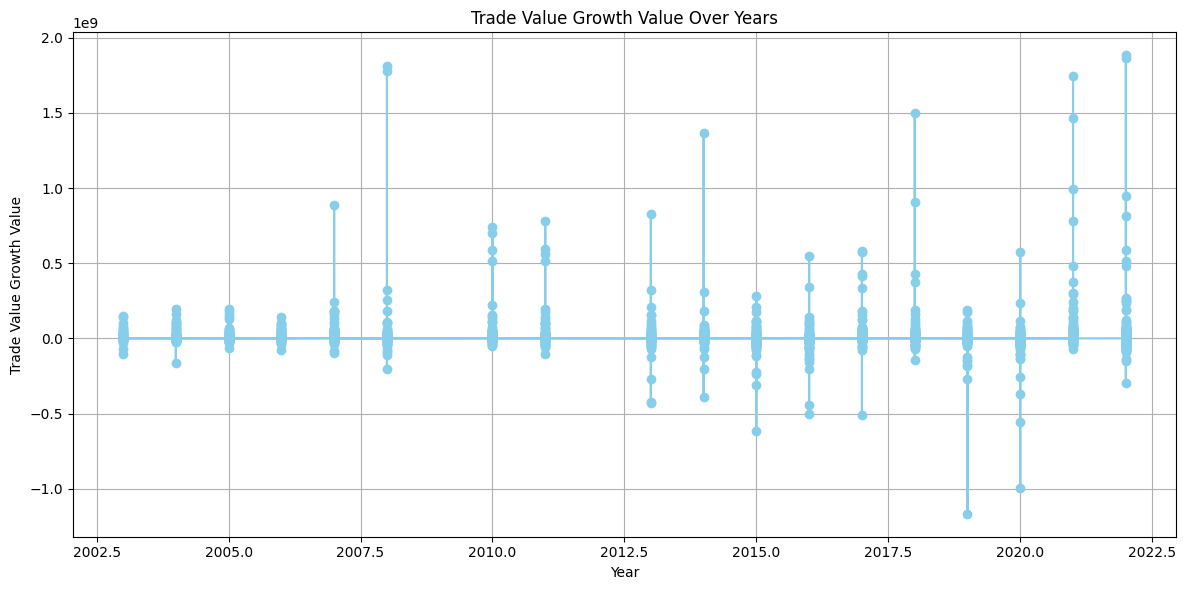

In [ ]:
# Line Plot for Trade Value Over Years
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Trade Value Growth Value'], marker='o', linestyle='-', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Trade Value Growth Value')
plt.title('Trade Value Growth Value Over Years')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# mélanger les produits pour avoir plus de precision du modele
df = df.sample(frac=1).reset_index(drop=True)

# Feature selection

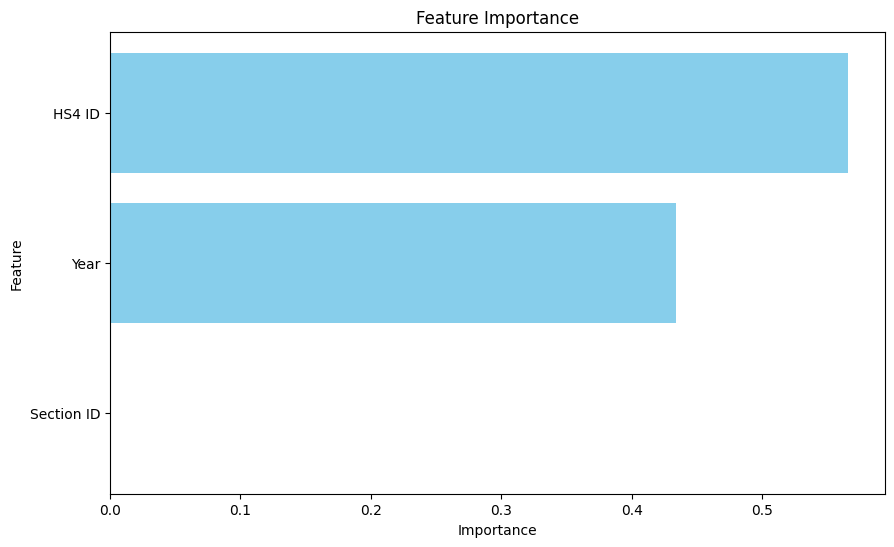

      Feature  Importance
0      HS4 ID    0.565691
1        Year    0.434018
2  Section ID    0.000292


In [ ]:
X =  df[['HS4 ID','Year','Section ID']]
y = df['Trade Value Growth Value']

# Initialize and train the Random Forest model
model = RandomForestRegressor(random_state=42)  # Use RandomForestRegressor for regression
model.fit(X, y)

feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Print the feature importances
print(importance_df)

<Axes: >

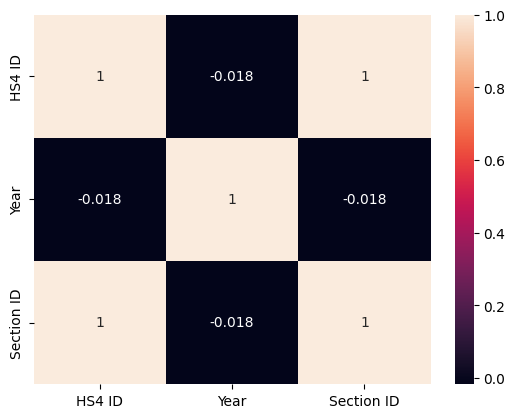

In [ ]:
sns.heatmap(df[['HS4 ID','Year','Section ID']].corr(),annot = True)

In [ ]:
df =df[['HS4 ID','Year', 'Trade Value Growth Value']]

In [ ]:
display(df.head())

,HS4 ID,Year,Trade Value Growth Value
0,115208,2004,637545.0
1,74010,2022,132289.0
2,62820,2015,-121985.0
3,84206,2013,-2373.0
4,157322,2022,608138.0


# Data Preprocessing

In [ ]:
# Preprocess the data
# Sort by Year to maintain the temporal order
df = df.sort_values(by='Year')

# Select the features and target
features = ['HS4 ID', 'Year']
target = 'Trade Value Growth Value'

# Normalize the data
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df[target] = scaler.fit_transform(df[[target]])

# Modeling

In [ ]:
target = 'Trade Value Growth Value'
# Create sequences
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:(i + seq_length)].drop(target, axis=1).values
        y = data.iloc[i + seq_length][target]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Define sequence length
SEQ_LENGTH = 5

# Create sequences
X, y = create_sequences(df, SEQ_LENGTH)

# Split into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(SEQ_LENGTH, len(df.columns)-1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictionsv
predictions = model.predict(X_test)


Epoch 1/50
388/388 [==============================] - 4s 5ms/step - loss: 0.0054 - val_loss: 3.3836e-04
Epoch 2/50
388/388 [==============================] - 2s 5ms/step - loss: 1.7344e-04 - val_loss: 2.5814e-04
Epoch 3/50
388/388 [==============================] - 4s 9ms/step - loss: 1.6742e-04 - val_loss: 2.5864e-04
Epoch 4/50
388/388 [==============================] - 2s 5ms/step - loss: 1.6890e-04 - val_loss: 2.4559e-04
Epoch 5/50
388/388 [==============================] - 2s 4ms/step - loss: 1.7308e-04 - val_loss: 3.4103e-04
Epoch 6/50
388/388 [==============================] - 2s 5ms/step - loss: 1.7048e-04 - val_loss: 2.4152e-04
Epoch 7/50
388/388 [==============================] - 2s 6ms/step - loss: 1.7348e-04 - val_loss: 2.8292e-04
Epoch 8/50
388/388 [==============================] - 2s 5ms/step - loss: 1.6984e-04 - val_loss: 2.5074e-04
Epoch 9/50
388/388 [==============================] - 3s 7ms/step - loss: 1.6977e-04 - val_loss: 2.4176e-04
Epoch 10/50
388/388 [===========

In [ ]:
# Inverse transform the predictions and actual values for comparison
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_inverse = scaler.inverse_transform(predictions)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inverse, predictions_inverse)
mae = mean_absolute_error(y_test_inverse, predictions_inverse)
r2 = r2_score(y_test_inverse, predictions_inverse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 5053032432162400.0
Mean Absolute Error (MAE): 13156252.1511006
R-squared (R²): -0.005916098353556887


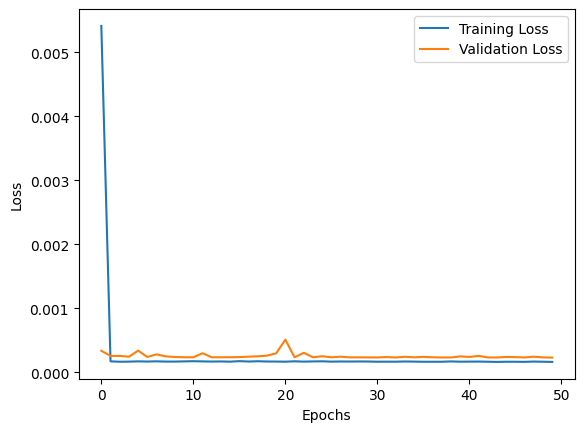

In [ ]:
# Plot the loss function
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Save the model
model.save('lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Save the scaler
with open('features_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:

# Split the data into features and target
X = df.drop(target, axis=1)
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Define and train the Support Vector Regressor model
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Inverse transform the predictions and actual values for comparison
y_test_inverse = scaler.inverse_transform(y_test.values.reshape(-1, 1))
y_pred_lr_inverse = scaler.inverse_transform(y_pred_lr.reshape(-1, 1))
y_pred_svr_inverse = scaler.inverse_transform(y_pred_svr.reshape(-1, 1))

# Calculate evaluation metrics
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

mse_lr, mae_lr, r2_lr = evaluate_model(y_test_inverse, y_pred_lr_inverse)
mse_svr, mae_svr, r2_svr = evaluate_model(y_test_inverse, y_pred_svr_inverse)

print(f'Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, R²: {r2_lr}')
print(f'Support Vector Regressor - MSE: {mse_svr}, MAE: {mae_svr}, R²: {r2_svr}')


Linear Regression - MSE: 1178095151325102.0, MAE: 6566607.537573351, R²: -0.0009224168504335939
Support Vector Regressor - MSE: 2.8932237166162224e+16, MAE: 148105868.11434665, R²: -23.581142462620708


In [ ]:
# Save the models using pickle
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

with open('svr_model.pkl', 'wb') as file:
    pickle.dump(svr_model, file)

In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('mr_exports_growth_processed.csv', index=False)